In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import missingno as msno

In [2]:
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

### 데이터 살펴보기

In [3]:
data = pd.read_csv('/kaggle/input/bank-marketing/bank-additional-full.csv', sep=';')
data.head(15)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**고객의 특징 변수** 
1. age(나이)
2. job(직업)
3. martial(결혼 여부)
4. education(교육 수준)
5. default(신용 불량 여부)
6. housing(주택 대출 여부)
7. loan(개인 대출 여부)

**캠페인 변수**
1. contact(연략 유형)
2. month(마지막 연락 월)
3. day_of_week(마지막 연락 요일)
4. duration(마지막 연락 지속 시간, 초 단위)
5. campaign(캠페인 동안 연락 횟수)
6. pdays(이전 캠페인 후 지난 일수)
7. previous(이전 캠페인 동안 연락 횟수)
8. poutcome(이전 캠페인의 결과)

**경제지수 변수**
1. emp.var.rate(고용 변동률)
2. cons.price.idx(소비자 물가 지수)
3. cons.conf.idx(소비자 신뢰 지수)
4. euribor3m(3개월 유리보 금리)
5. nr.employed(고용자 수)

**target(y)**


In [4]:
# columns
# missing values
# dtypes

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
for i in data.columns:
  print(i)
  print(f'고유값 : {data[i].unique()}')
  print(f'고유 갯수 : {data[i].nunique()}')
  print('=' * 50)

age
고유값 : [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
고유 갯수 : 78
job
고유값 : ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
고유 갯수 : 12
marital
고유값 : ['married' 'single' 'divorced' 'unknown']
고유 갯수 : 4
education
고유값 : ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
고유 갯수 : 8
default
고유값 : ['no' 'unknown' 'yes']
고유 갯수 : 3
housing
고유값 : ['no' 'yes' 'unknown']
고유 갯수 : 3
loan
고유값 : ['no' 'yes' 'unknown']
고유 갯수 : 3
contact
고유값 : ['telephone' 'cellular']
고유 갯수 : 2
month
고유값 : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
고유 갯수 : 10
day_of_week
고유값 : ['mon' 'tue' 'wed' 'thu' 'fri']
고유 갯수 : 5
duration
고유값 : [ 261  149  226

In [6]:
def data_col_overview(df):
    column_info_data = []

    for col in df.columns:
        # Calculate null count, including 'unknown' for object types
        null_count = df[col].isna().sum() + (df[col] == 'unknown').sum() if df[col].dtype == 'object' else df[col].isna().sum()
        null_percentage = (null_count / len(df)) * 100  # Null percentage

        # dtype & unique value count
        data_type = df[col].dtype
        unique_count = df[col].nunique()

        # Summary data as dict type
        column_info_data.append({
            'Column Name': col,
            'Null Value Count': null_count,
            'Null Value %': round(null_percentage, 2),
            'Data Type': data_type,
            'Unique Value Count': unique_count
        })

    # To DataFrame
    column_info_df = pd.DataFrame(column_info_data)

    return column_info_df

In [7]:
data_col_overview(data)

,Column Name,Null Value Count,Null Value %,Data Type,Unique Value Count
0,age,0,0.00,int64,78
1,job,330,0.80,object,12
2,marital,80,0.19,object,4
3,education,1731,4.20,object,8
4,default,8597,20.87,object,3
5,housing,990,2.40,object,3
6,loan,990,2.40,object,3
7,contact,0,0.00,object,2
8,month,0,0.00,object,10
9,day_of_week,0,0.00,object,5


<Axes: >

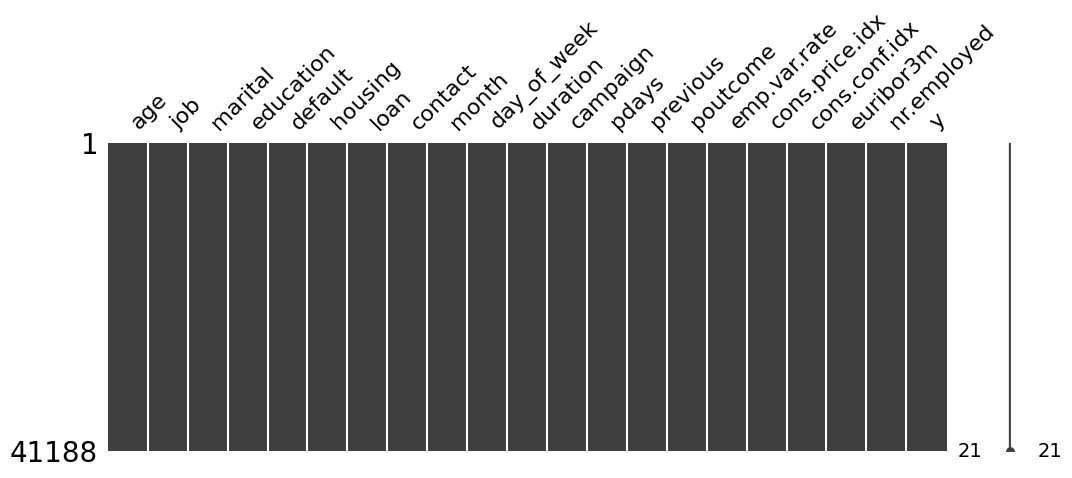

In [8]:
# 결측치 시각화
msno.matrix(data, figsize=(12, 4))

In [9]:
# 수치형 데이터 통계량
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


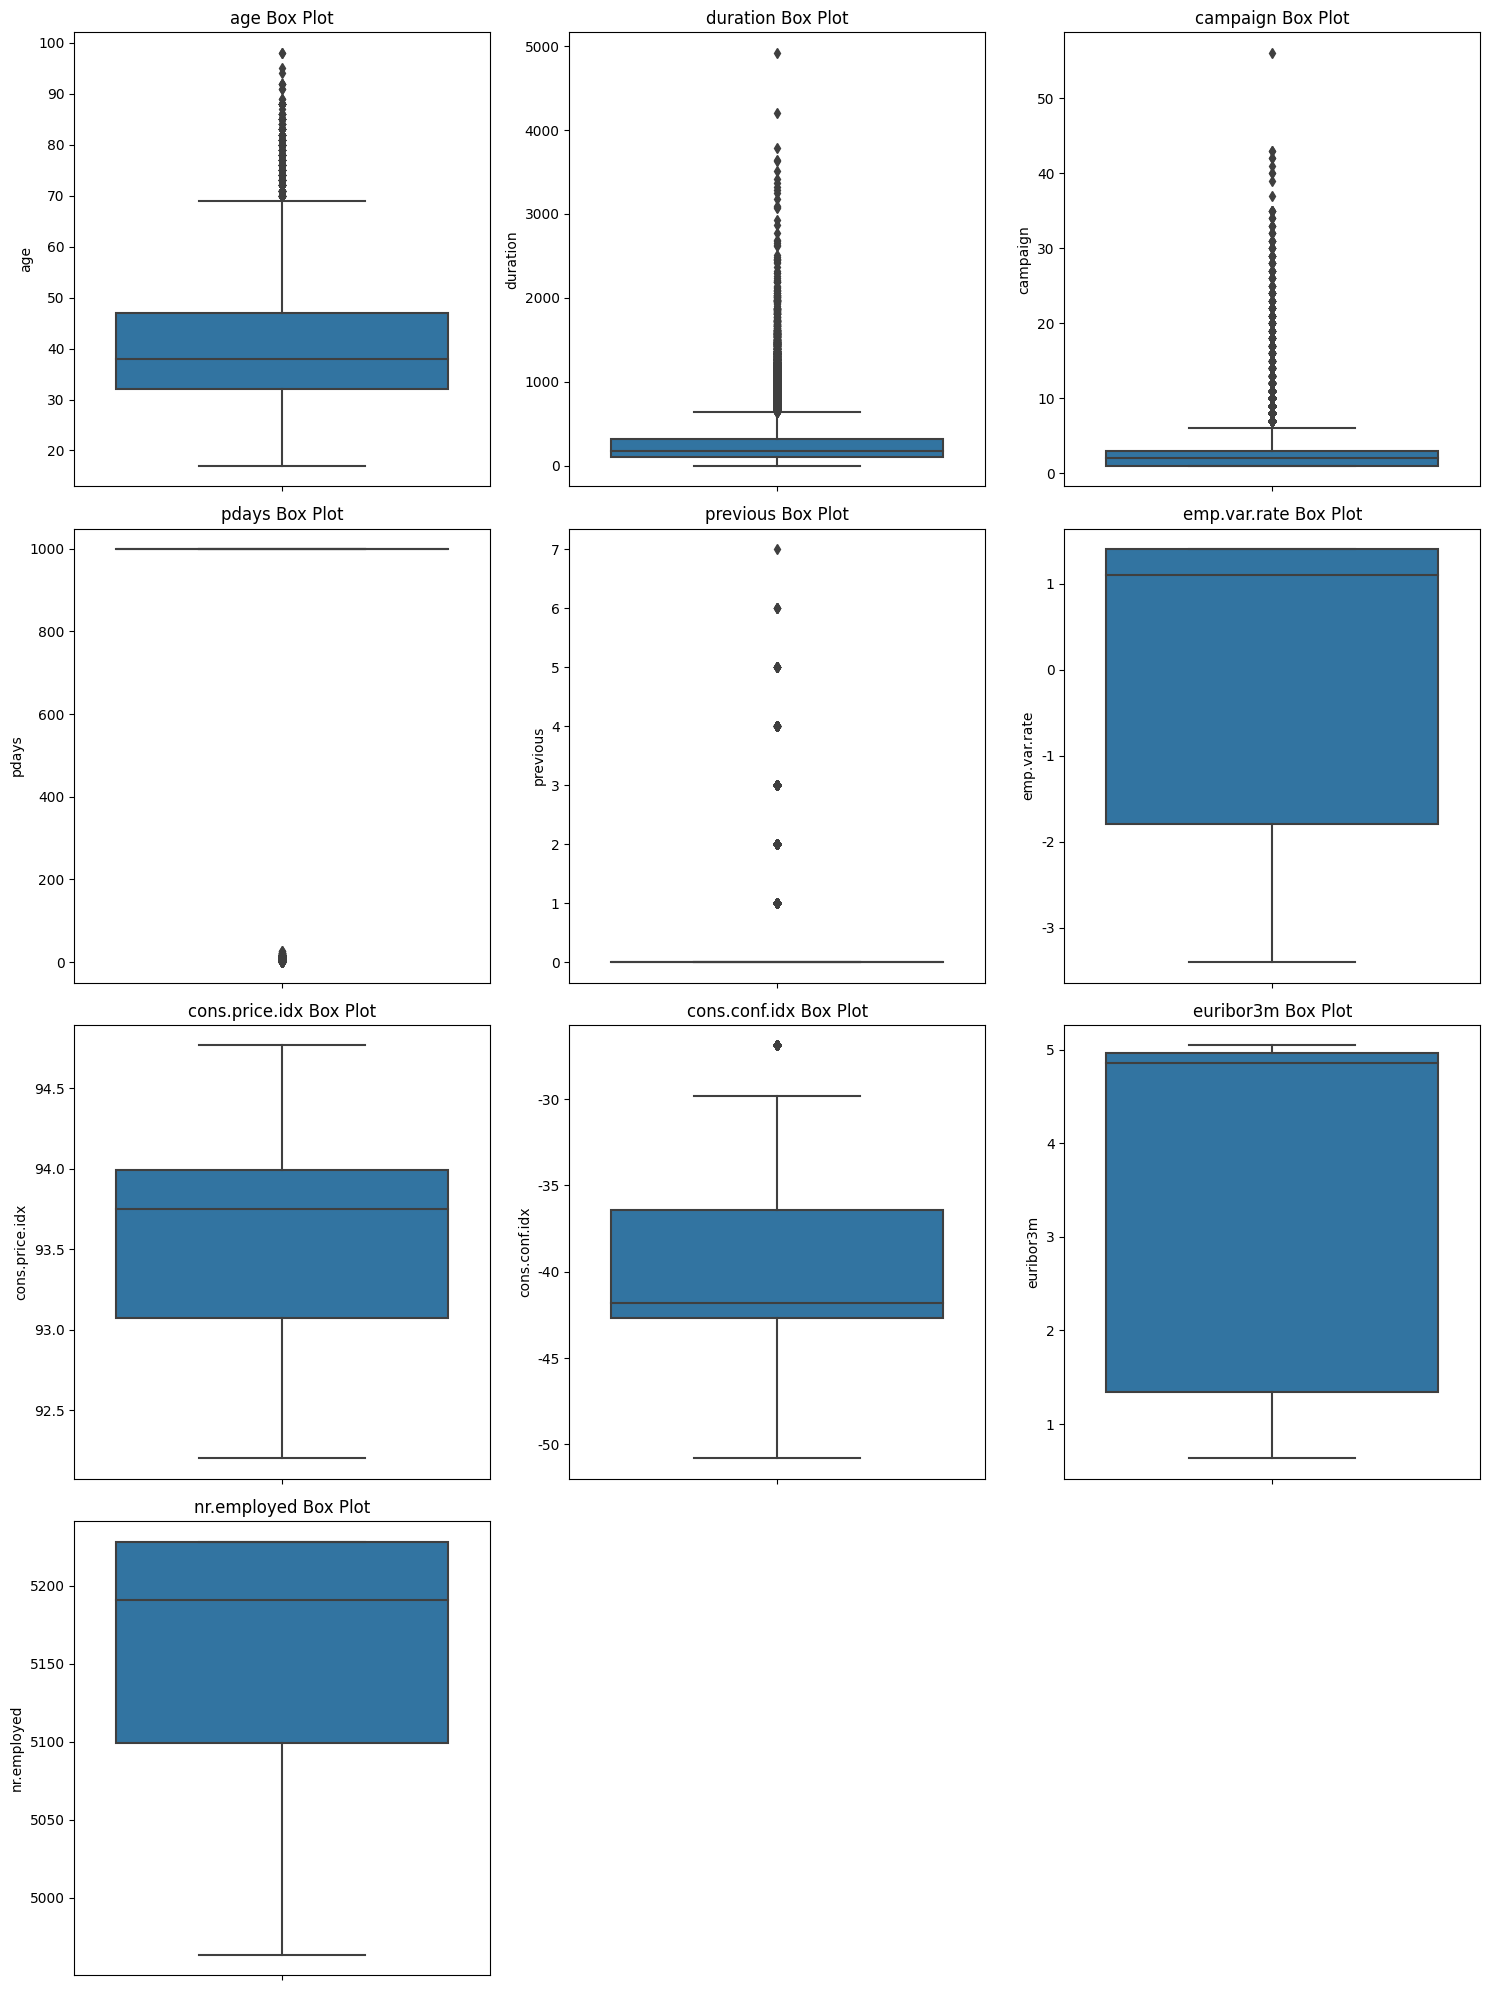

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot 시각화 (모든 변수에 대해)
columns = ['age', 'duration', 'campaign', 'pdays', 'previous', 
           'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 
           'euribor3m', 'nr.employed']

# Subplot 설정
n_cols = 3  # 한 행에 들어갈 그래프 수
n_rows = -(-len(columns) // n_cols)  # 행 개수 계산 (올림)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # 1차원 배열로 변환

for i, col in enumerate(columns):
    sns.boxplot(data=data, y=col, ax=axes[i])
    axes[i].set_title(f'{col} Box Plot')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col)

# 나머지 빈 subplot 제거
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [11]:
# 범주형 데이터 통계량
data.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


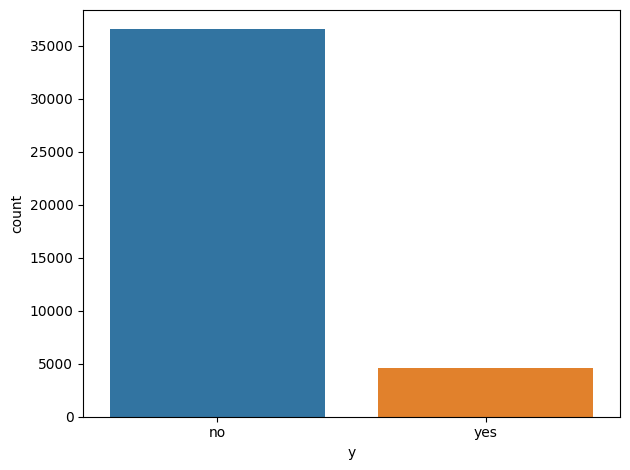

In [12]:
y_counts = data['y'].value_counts().reset_index()
y_counts.columns = ['y', 'count']

sns.barplot(data=y_counts, x='y', y='count')

plt.tight_layout()
plt.show()


### 고객 특징 변수

/tmp/ipykernel_17/1732245636.py:45: UserWarning: Glyph 51649 (\N{HANGUL SYLLABLE JIG}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_17/1732245636.py:45: UserWarning: Glyph 50629 (\N{HANGUL SYLLABLE EOB}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_17/1732245636.py:45: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_17/1732245636.py:45: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_17/1732245636.py:45: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_17/1732245636.py:45: UserWarning: Glyph 54844 (\N{HANGUL SYLLABLE HON}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_17/1732245636.py:45: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_17/1732245636.py:45: UserWarning: Glyp

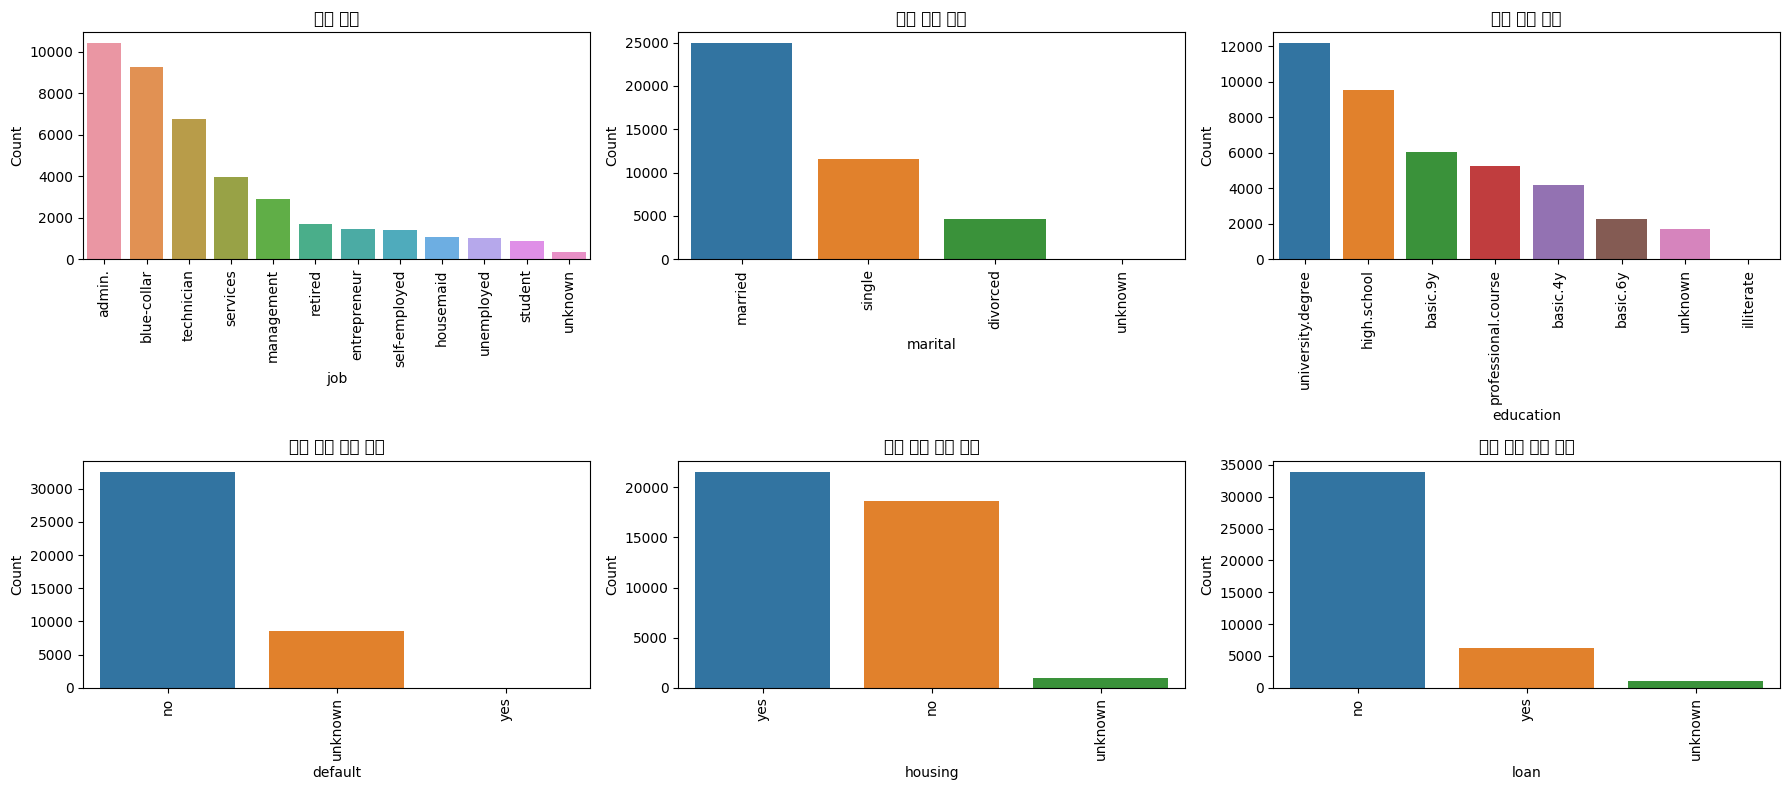

In [13]:
# 데이터를 집계하여 새로운 데이터프레임 생성
job_counts = data['job'].value_counts().reset_index()
job_counts.columns = ['job', 'count']

marital_counts = data['marital'].value_counts().reset_index()
marital_counts.columns = ['marital', 'count']

education_counts = data['education'].value_counts().reset_index()
education_counts.columns = ['education', 'count']

default_counts = data['default'].value_counts().reset_index()
default_counts.columns = ['default', 'count']

housing_counts = data['housing'].value_counts().reset_index()
housing_counts.columns = ['housing', 'count']

loan_counts = data['loan'].value_counts().reset_index()
loan_counts.columns = ['loan', 'count']

# Figure와 Subplot 생성
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18, 8)

# 각 subplot에 Barplot 생성
sns.barplot(data=job_counts, x='job', y='count', ax=ax1)
sns.barplot(data=marital_counts, x='marital', y='count', ax=ax2)
sns.barplot(data=education_counts, x='education', y='count', ax=ax3)
sns.barplot(data=default_counts, x='default', y='count', ax=ax4)
sns.barplot(data=housing_counts, x='housing', y='count', ax=ax5)
sns.barplot(data=loan_counts, x='loan', y='count', ax=ax6)

# 각 subplot의 제목과 레이블 설정
ax1.set(ylabel='Count', title='직업 분포')
ax2.set(ylabel='Count', title='결혼 상태 분포')
ax3.set(ylabel='Count', title='교육 수준 분포')
ax4.set(ylabel='Count', title='신용 불량 여부 분포')
ax5.set(ylabel='Count', title='주택 대출 여부 분포')
ax6.set(ylabel='Count', title='개인 대출 여부 분포')

# x축 레이블 회전 추가
for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


plt.tight_layout()
plt.show()

1. admin.(사무직)이 가장 많은 것을 확인할 수 있다.
2. blue-collar(현장직)이 그 다음으로 많고, technician(전문직), services(서비스직), management(관리직), retired(은퇴), entrepreneur(기업가), self-employed(자영업), housemaid(주택주인), student(학생), unemployed(비직) 순으로 정렬되어 있다.
3. 결혼한 사람이 가장 많고, 미혼, 이혼, 알 수 없음 순으로 정렬되어 있다.
4. 교육 수준은 대학 학사가 가장 많다.
5. 신용 불량 여부를 봤을 때 대부분이 'no'이고 Unknow이 일부분 차지하고 그래프 상 'yes'에 응답한 사람은 확인할 수 없다.
6. 주택 대출 여부의 응답으로 보아 'yes'와 'no'의 분포는 비슷하지만 'yes'가 더 높은 것을 알 수 있다.
7. 개인 대출 여부의 응답은 대부분 'no'이다.
8. 범주형 데이터에 'unknown'이 있는 것을 알 수 있다. 이 값을 어떻게 처리해야할까?


In [14]:
data[data['default'] == 'yes']

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
21580,48,technician,married,professional.course,yes,no,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
21581,48,technician,married,professional.course,yes,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
24866,31,unemployed,married,high.school,yes,no,no,cellular,nov,tue,...,2,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no


In [15]:
data['default'].value_counts()

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

In [16]:
data['job'].value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

### 캠페인 변수

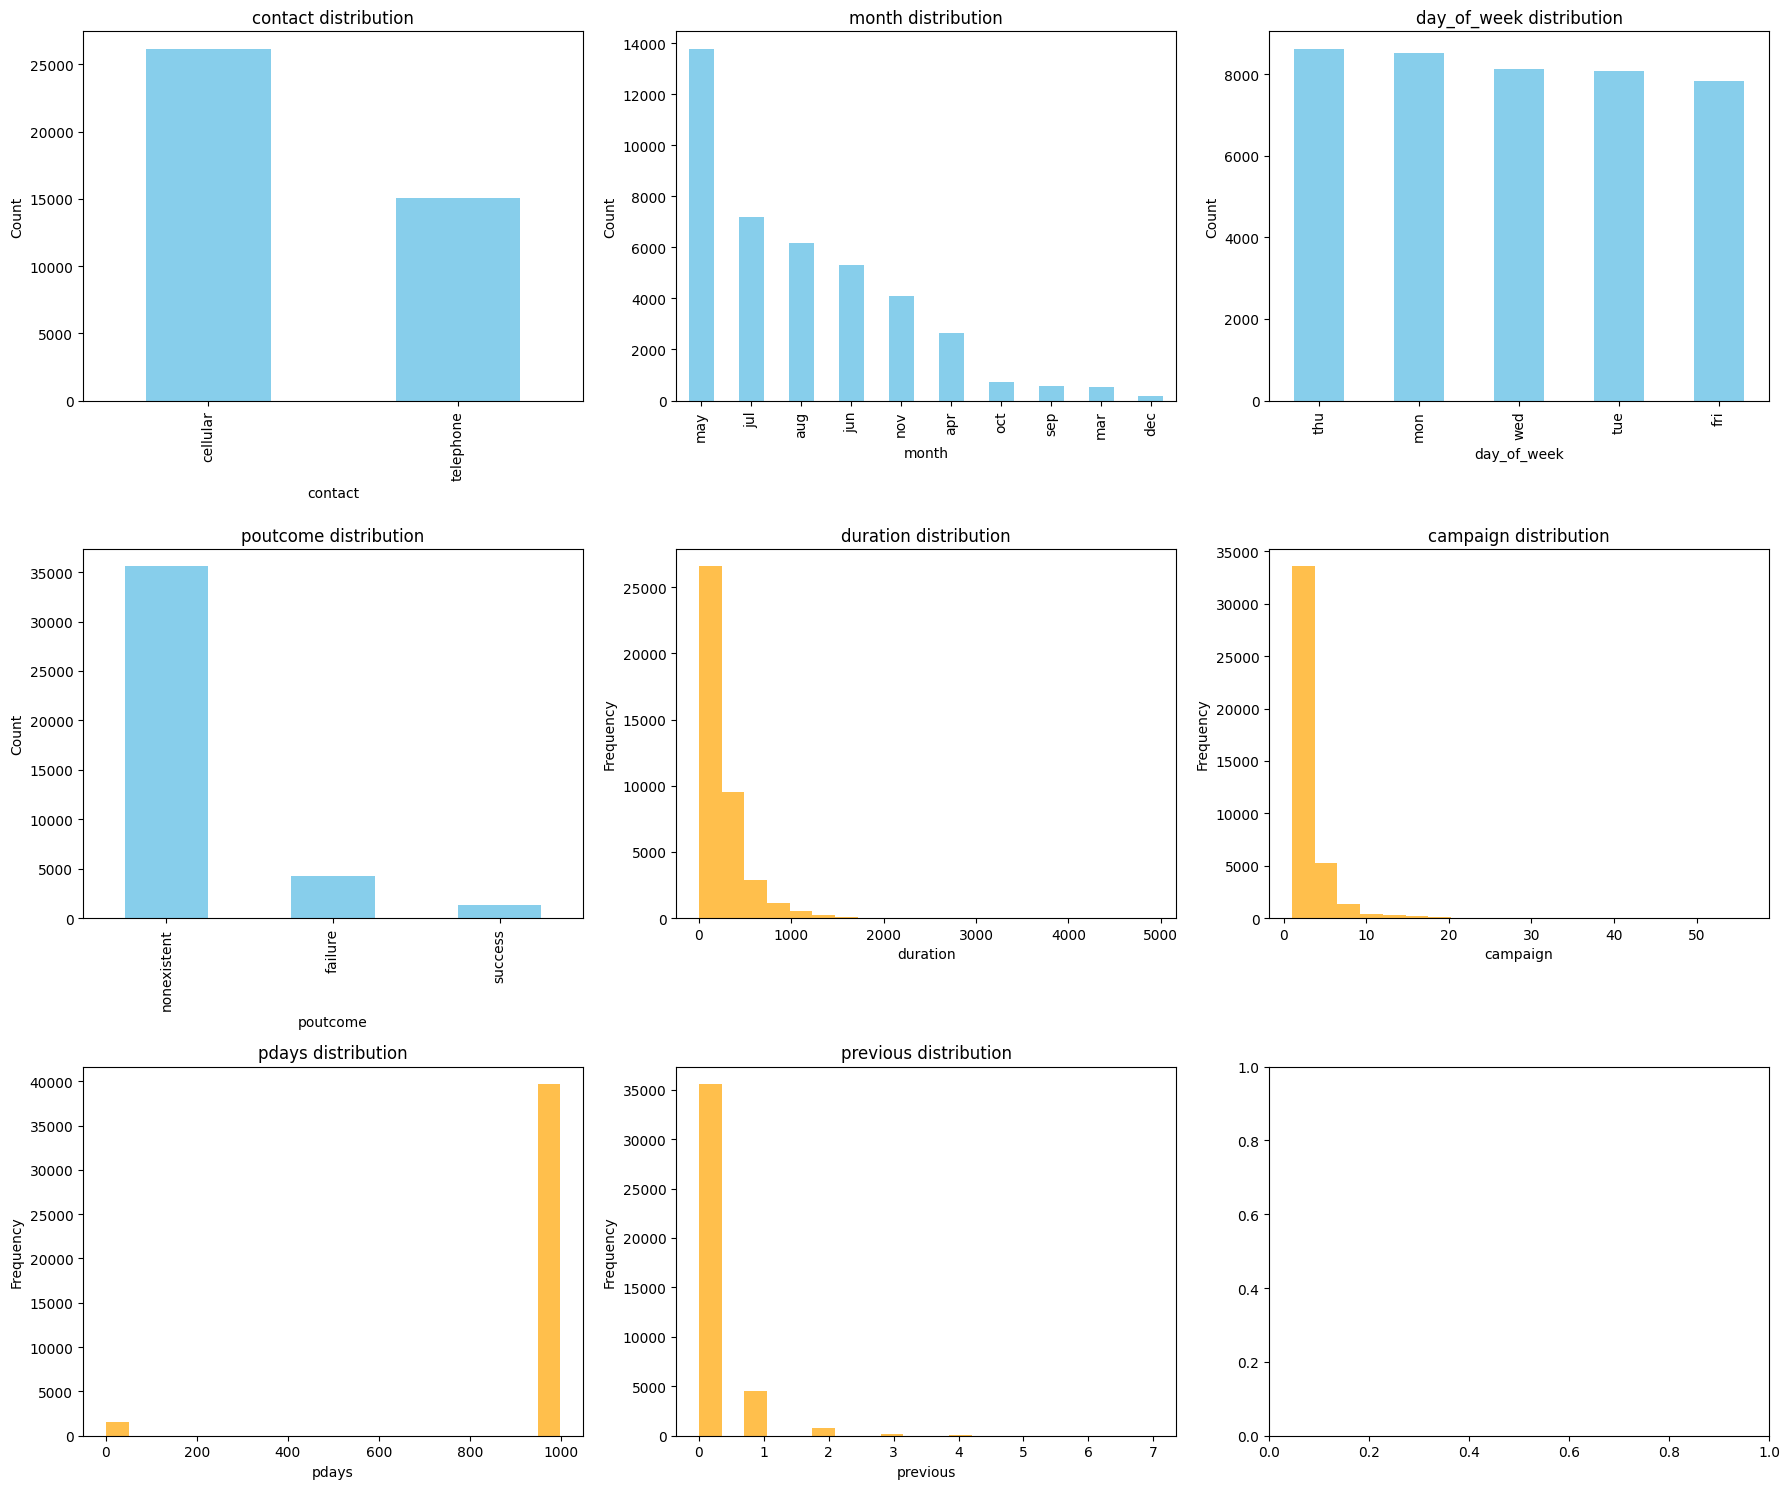

In [17]:
# Subplot 생성
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

# 범주형 변수 시각화
campaign_categorical_cols = ['contact', 'month', 'day_of_week', 'poutcome']
for i, col in enumerate(campaign_categorical_cols):
    data[col].value_counts().plot(kind='bar', ax=axes[i], color='skyblue')
    axes[i].set_title(f"{col} distribution")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# 수치형 변수 시각화
campaign_numerical_cols = ['duration', 'campaign', 'pdays', 'previous']
for i, col in enumerate(campaign_numerical_cols):
    data[col].plot(kind='hist', ax=axes[i + len(campaign_categorical_cols)], bins=20, color='orange', alpha=0.7)
    axes[i + len(campaign_categorical_cols)].set_title(f"{col} distribution")
    axes[i + len(campaign_categorical_cols)].set_xlabel(col)
    axes[i + len(campaign_categorical_cols)].set_ylabel('Frequency')

# 레이아웃 조정
plt.tight_layout()
plt.show()

- pdays의 값이 999인 경우, 이전 캠페인에 참여하지 않은 사람들로 확인된다.

### 경제 지수 변수

In [18]:
economic = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

data[economic].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   emp.var.rate    41188 non-null  float64
 1   cons.price.idx  41188 non-null  float64
 2   cons.conf.idx   41188 non-null  float64
 3   euribor3m       41188 non-null  float64
 4   nr.employed     41188 non-null  float64
dtypes: float64(5)
memory usage: 1.6 MB


In [19]:
data[economic].describe()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,1.570960,0.578840,4.628198,1.734447,72.251528
min,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,1.400000,94.767000,-26.900000,5.045000,5228.100000


1. 고용변동률 (emp.var.rate)
- 범위 : -3.4 ~ 1.4
- 평균 : 0.0819
- 고용률의 변화를 측정하는 지표로, 값이 음수이면 고용이 줄어드는 것을 의미하고, 양수이면 증가하는 것을 의미한다.
- 데이터의 최소값(min) -3.4는 상당히 부정적인 상황을 반영한다. 반면 최대값(max) 1.4는 고용 증가를 의미한다.
- 평균이 약 0.08로 데이터 기간동안 고용은 거의 변화가 없는 정체 상태로 보인다.

2. 소비자 물가 지수 (cons.price.idx)
- 범위 : 92.2 ~ 94.77
- 평균 : 93.5766
- 소비자물가지수는 물가의 전반적인 변화를 나타내며, 92.2에서 94.77 사이의 좁은 범위를 가진다.
- 좋은 상황 : 물가가 안정적일 때, 일반적으로 2%의 인플레이션은 건강한 경제로 간주됩니다.
- 나쁜 상황 : 물가가 빠르게 상승하거나 (고인플레이션), 지나치게 하락할 경우 (디플레이션)
- 데이터 범위가 좁고 평균이 안정적이므로, 분석 대상 기간 동안 물가 변화는 상대적으로 안정적이라고 볼 수 있다.

3. 소비자 신뢰 지수 (cons.conf.idx)
- 범위 : -50.8 ~ -26.9
- 평균 : -40.5
- 소비자 신뢰지수는 경제에 대한 소비자의 신뢰를 나타내며, 양수는 신뢰 증가, 음수는 신뢰 감소를 의미합니다.
- 좋은 상황 : 신뢰지수가 높아질수록 소비 활동 증가
- 나쁜 상황 : 신뢰지수가 낮아질수록 경제적 불안 증가
- 평균이 -40.5로 나타나는 것은 소비자들이 미래 경제 상황에 대해 상당히 비관적임을 보여준다. 특히, 최소값 -50.8은 매우 부정적인 경제 상황을 나타낸다.

4. 3개월 유리보 금리 (euribor3m)
- 범위 : 0.634 ~ 5.045
- 평균 : 3.62
- 유리보 금리는 은행 간 단기 대출 금리로, 경제 유동성과 대출 비용에 영향을 미친다.
- 좋은 상황 : 적정 금리는 1~3% 사이. 금리가 너무 낮으면 경제 위축 신호, 너무 높으면 대출 부담 증가
- 나쁜 상황 : 지나치게 높은 금리는 소비와 투자를 억제
- 평균이 3.62로 다소 높은 편이며, 최대값 5.045는 대출 비용 부담이 클 수 있음을 암시한다.

5. 고용자 수 (nr.employed)
- 범위 : 4963.6 ~ 5228.1
- 평균 : 5167.04
- 고용자 수는 경제 활동 인구의 규모를 나타냅니다.
- 좋은 상황 : 값이 지속적으로 증가할 때
- 나쁜 상황 : 값이 감소하거나 정체될 경우
- 평균 5167.04는 안정적인 고용 상태를 나타낼 수 있지만, 하한선인 4963.6에서 상한선인 5228.1로 변화가 크지 않으므로 고용은 정체 상태로 보인다.

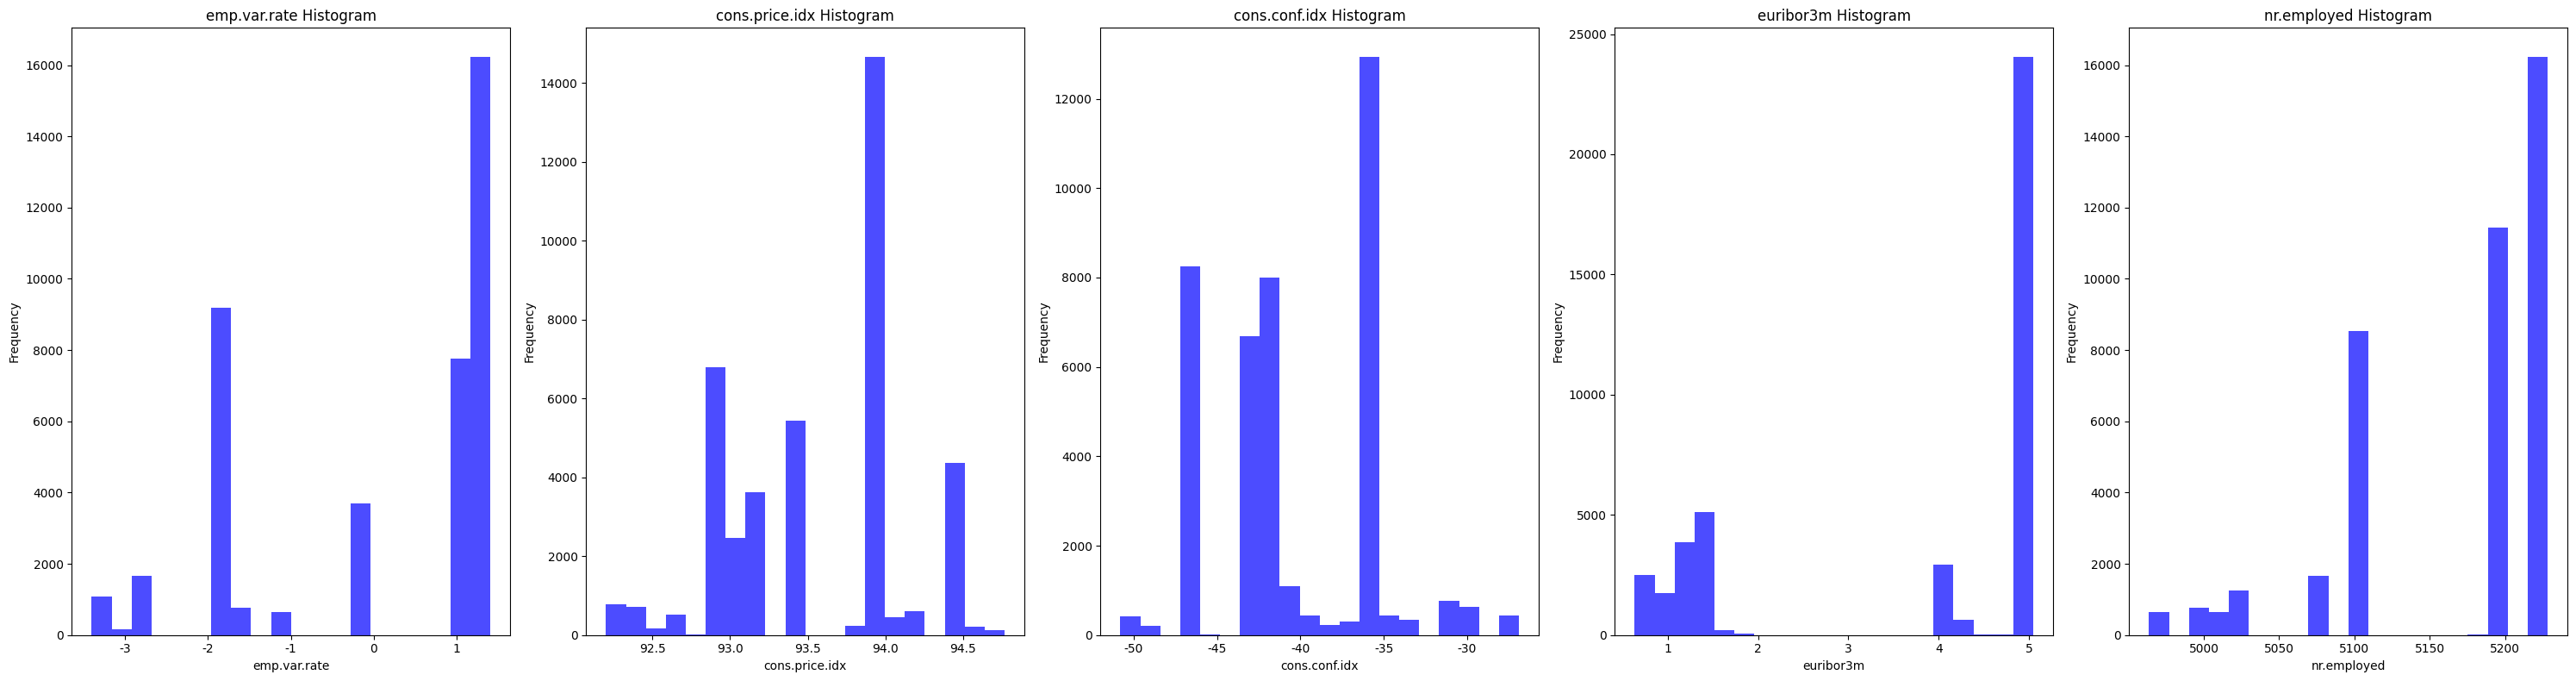

In [20]:
fig, axes = plt.subplots(1, 5, figsize=(30, 8))
axes = axes.flatten()

# 히스토그램 (첫 번째 행)
for i, col in enumerate(economic):
    data[col].plot(kind='hist', bins=20, ax=axes[i], color='blue', alpha=0.7)
    axes[i].set_title(f"{col} Histogram")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# 레이아웃 조정
plt.tight_layout()
plt.show()

In [21]:
data.groupby('y')[data[economic].columns].agg(['mean','min','max']).T

y                             no          yes
emp.var.rate   mean     0.248875    -1.233448
               min     -3.400000    -3.400000
               max      1.400000     1.400000
cons.price.idx mean    93.603757    93.354386
               min     92.201000    92.201000
               max     94.767000    94.767000
cons.conf.idx  mean   -40.593097   -39.789784
               min    -50.800000   -50.800000
               max    -26.900000   -26.900000
euribor3m      mean     3.811491     2.123135
               min      0.634000     0.634000
               max      5.045000     5.045000
nr.employed    mean  5176.166600  5095.115991
               min   4963.600000  4963.600000
               max   5228.100000  5228.100000

1. 고용변동률 (emp.var.rate)

- yes 그룹(대출 성공)의 평균 고용변동률은 -1.23, no 그룹(대출 실패)의 평균 고용변동률은 0.25이다.
- 이 지표는 경제 성장률과 노동 시장 상황을 나타낸다.
- yes 그룹의 고용변동률이 더 낮다는 점은 대출 성공이 상대적으로 경제 불황기(고용 감소)에서 더 많이 발생했음을 의미한다.
- 결론: 경제가 불황일수록 고객이 대출을 받을 가능성이 높아진다.

2. 소비자물가지수 (cons.price.idx)

- yes 그룹의 평균 소비자물가지수는 93.35, no 그룹의 평균은 93.60이다.
- 소비자물가지수는 인플레이션 수준을 나타낸다.
- yes와 no 그룹 간의 큰 차이는 보이지 않다.
- 결론: 대출 성공 여부는 소비자물가지수와 크게 연관이 없어 보인다.

3. 소비자 신뢰지수 (cons.conf.idx)

- yes 그룹의 평균 소비자 신뢰지수는 -39.78, no 그룹은 -40.59로 약간 더 낮다.
- 신뢰지수가 음수일수록 소비자들이 경제에 대해 비관적이다.
- yes 그룹의 소비자 신뢰지수가 약간 더 높다는 점은 비관적일수록 대출 신청이 증가하더라도 비교적 긍정적인 소비자가 대출을 성공적으로 받았을 가능성을 시사한다.
- 결론: 소비자의 경제 신뢰도가 낮을수록 대출 신청이 증가할 가능성이 있다.

4. 3개월 유리보 금리 (euribor3m)

- yes 그룹의 평균 금리는 2.12, no 그룹의 평균 금리는 3.81로 차이가 크다.
- 유리보 금리는 금융시장의 금리를 나타내며, 낮은 금리일수록 차입 비용이 감소하여 대출을 받을 가능성이 높아진다.
- 결론: 대출 성공은 낮은 금리 환경에서 더 자주 발생한다.

5. 고용자 수 (nr.employed)

- yes 그룹의 평균 고용자 수는 5095.11, no 그룹은 5176.17이다.
- 고용자 수는 경제 활성화 수준과 밀접하게 연결되며, 고용이 높은 시기에는 대출 성공률이 상대적으로 낮다.
- 결론: 고용 수준이 낮을수록 대출 성공 확률이 증가한다.


**종합**

이 데이터는 대출 성공 여부가 경제 상황과 어떻게 연결되어 있는지를 잘 보여준다.
- 경제 불황(낮은 고용 변동률, 낮은 고용자 수, 낮은 유리보 금리)에서 대출 성공 확률이 더 높음.
- 소비자물가지수는 큰 영향을 미치지 않지만, 소비자 신뢰지수는 약한 관계를 보임.

### KNN을 활용하여 결측값 대체

In [22]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder

# 범주형 데이터 선택
categorical_data = data.select_dtypes(include=[object])

# OneHotEncoder를 사용하여 범주형 데이터를 인코딩
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_data = encoder.fit_transform(categorical_data)

# 인코딩된 데이터를 데이터프레임으로 변환
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(categorical_data.columns))

# 수치형 데이터 선택
numeric_data = data.select_dtypes(exclude=[object])

# 인코딩된 데이터와 수치형 데이터를 합침
complete_data = pd.concat([numeric_data, encoded_df], axis=1)

# KNNImputer 초기화 및 fitting
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(complete_data)

# imputed 데이터를 데이터프레임으로 변환
imputed_df = pd.DataFrame(imputed_data, columns=complete_data.columns)

# 원래 데이터와 imputed 데이터 비교
print("Before Imputation: ")
print(data.isin(['unknown']).sum())  # 결측치('unknown') 개수 확인

print("\nAfter Imputation: ")
print(imputed_df.isna().sum().sum())  # Imputed 데이터에서 NaN 개수 확인

Before Imputation: 
age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

After Imputation: 
0


### 모델링

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [24]:
# Replace 'unknown' with np.nan
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].astype(str).replace('unknown', np.nan)

# Separate categorical and numerical data
categorical_data = data.select_dtypes(include=['object'])
numeric_data = data.select_dtypes(exclude=['object'])

# One-hot encode categorical data
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)  # Update sparse to sparse_output
encoded_data = encoder.fit_transform(categorical_data)
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_data.columns))

# Combine encoded categorical and numerical data
complete_data = pd.concat([numeric_data.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

In [25]:
# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Perform KNN imputation
imputed_data = imputer.fit_transform(complete_data)

# Convert the imputed data back to a DataFrame
final_df = pd.DataFrame(imputed_data, columns=complete_data.columns)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder

# 타겟 변수('y') 분리 및 변환
y = data['y'].replace({'yes': 1, 'no': 0})

# 범주형 데이터에서 'y' 제외
categorical_data = data.select_dtypes(include=['object']).drop(columns=['y'])
numeric_data = data.select_dtypes(exclude=['object'])

# 범주형 데이터 원-핫 인코딩
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_data = encoder.fit_transform(categorical_data)
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_data.columns))

# 결합된 데이터 생성
complete_data = pd.concat([numeric_data.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

# 결측치 처리 (KNN Imputer)
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(complete_data)
final_df = pd.DataFrame(imputed_data, columns=complete_data.columns)

# 학습 데이터와 테스트 데이터로 분리
X = final_df  # 모든 특징 데이터 사용
y = y.reset_index(drop=True)  # 타겟 변수
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Train/Test Split Complete")
print(f"X_train shape: {X_train.shape}")
print(f"y_train distribution:\n{y_train.value_counts()}")

Train/Test Split Complete
X_train shape: (28831, 63)
y_train distribution:
y
0    25583
1     3248
Name: count, dtype: int64


/tmp/ipykernel_17/3687301620.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = data['y'].replace({'yes': 1, 'no': 0})


In [27]:
# RandomForest with class weights
rf_model = RandomForestClassifier(class_weight={0: 1, 1: 10}, random_state=42)

# XGBoost with scale_pos_weight
xgb_model = xgb.XGBClassifier(scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),
                               use_label_encoder=False, eval_metric='logloss', random_state=42)

In [28]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, classification_report
import matplotlib.pyplot as plt

# Random Forest with class weights
rf_model = RandomForestClassifier(class_weight={0: 1, 1: 10}, random_state=42)

# XGBoost with scale_pos_weight
xgb_model = xgb.XGBClassifier(scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),
                               use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train models
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

print("Models trained successfully!")

Models trained successfully!


In [29]:
# Predictions
rf_preds = rf_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

# Evaluation metrics
rf_accuracy = accuracy_score(y_test, rf_preds)
xgb_accuracy = accuracy_score(y_test, xgb_preds)

rf_precision = precision_score(y_test, rf_preds)
xgb_precision = precision_score(y_test, xgb_preds)

print(f"Random Forest - Accuracy: {rf_accuracy:.4f}, Precision: {rf_precision:.4f}")
print(f"XGBoost - Accuracy: {xgb_accuracy:.4f}, Precision: {xgb_precision:.4f}")

# Detailed classification report
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_preds))

print("\nXGBoost Classification Report:")
print(classification_report(y_test, xgb_preds))

Random Forest - Accuracy: 0.9098, Precision: 0.6819
XGBoost - Accuracy: 0.8834, Precision: 0.4897

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10965
           1       0.68      0.37      0.48      1392

    accuracy                           0.91     12357
   macro avg       0.80      0.68      0.72     12357
weighted avg       0.90      0.91      0.90     12357


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.89      0.93     10965
           1       0.49      0.84      0.62      1392

    accuracy                           0.88     12357
   macro avg       0.73      0.86      0.77     12357
weighted avg       0.92      0.88      0.90     12357



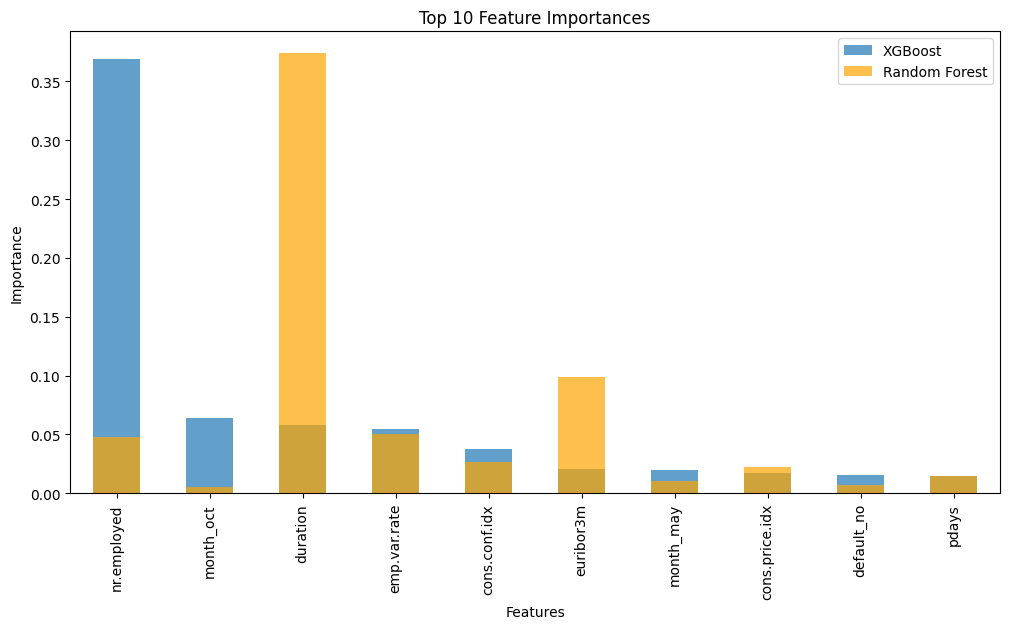

In [30]:
# Feature importance for both models
xgb_importances = xgb_model.feature_importances_
rf_importances = rf_model.feature_importances_

# Create a DataFrame for visualization
feature_names = X.columns
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "XGBoost Importance": xgb_importances,
    "Random Forest Importance": rf_importances
}).set_index("Feature")

# Sort by importance for better visualization
importance_df.sort_values(by="XGBoost Importance", ascending=False, inplace=True)

# Plot feature importances
plt.figure(figsize=(12, 6))
importance_df["XGBoost Importance"].head(10).plot(kind='bar', alpha=0.7, label="XGBoost")
importance_df["Random Forest Importance"].head(10).plot(kind='bar', alpha=0.7, color='orange', label="Random Forest")
plt.title("Top 10 Feature Importances")
plt.ylabel("Importance")
plt.xlabel("Features")
plt.legend()
plt.show()

In [31]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score

# Initialize models
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
rf_model = RandomForestClassifier(random_state=42)

# Train models
xgb_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Predictions and performance metrics
xgb_preds = xgb_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

xgb_accuracy = accuracy_score(y_test, xgb_preds)
rf_accuracy = accuracy_score(y_test, rf_preds)

xgb_roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

print(f"XGBoost Accuracy: {xgb_accuracy}, ROC-AUC: {xgb_roc_auc}")
print(f"Random Forest Accuracy: {rf_accuracy}, ROC-AUC: {rf_roc_auc}")

XGBoost Accuracy: 0.9150279193979121, ROC-AUC: 0.9464900729070029
Random Forest Accuracy: 0.9131666262037711, ROC-AUC: 0.9411126245472794


In [32]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, classification_report

# Initialize LightGBM model
lgb_model = lgb.LGBMClassifier(class_weight='balanced', random_state=42)

# Train the model
lgb_model.fit(X_train, y_train)

# Predictions
lgb_preds = lgb_model.predict(X_test)

# Evaluation metrics
lgb_accuracy = accuracy_score(y_test, lgb_preds)
lgb_precision = precision_score(y_test, lgb_preds)

print(f"LightGBM - Accuracy: {lgb_accuracy:.4f}, Precision: {lgb_precision:.4f}")
print("\nLightGBM Classification Report:")
print(classification_report(y_test, lgb_preds))

[LightGBM] [Info] Number of positive: 3248, number of negative: 25583
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 773
[LightGBM] [Info] Number of data points in the train set: 28831, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
LightGBM - Accuracy: 0.8736, Precision: 0.4686

LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.87      0.92     10965
           1       0.47      0.91      0.62      1392

    accuracy                           0.87     12357
   macro avg       0.73      0.89      0.77     12357
weighted avg       0.93      0.87      0.89     12357



In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

param_grid = {
    'n_estimators': [100, 200, 300],  # 트리 개수
    'max_depth': [10, 20, 30],       # 트리 깊이
    'min_samples_split': [2, 5, 10], # 노드 분할 최소 샘플 수
    'min_samples_leaf': [1, 2, 4],   # 리프 노드 최소 샘플 수
    'max_features': ['sqrt', 'log2'] # 사용 특성 비율
}

# Random Forest 모델 초기화
rf_model = RandomForestClassifier(random_state=42, class_weight={0: 1, 1: 10})

# GridSearchCV 설정
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='f1',  # F1-스코어를 기준으로 최적화
    cv=3,          # 3-fold 교차 검증
    verbose=2,
    n_jobs=-1      # 병렬 처리
)

# Grid Search 실행
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 확인
print("Best Parameters:", grid_search.best_params_)
print("Best F1-Score:", grid_search.best_score_)

Fitting 3 folds for each of 162 candidates, totalling 486 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   4.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=3

In [34]:
# 최적 모델
best_rf_model = grid_search.best_estimator_

# 테스트 데이터 예측
y_pred = best_rf_model.predict(X_test)

# 평가 결과 출력
print("Classification Report on Test Data:")
print(classification_report(y_test, y_pred))

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.97      0.92      0.95     10965
           1       0.57      0.79      0.66      1392

    accuracy                           0.91     12357
   macro avg       0.77      0.86      0.80     12357
weighted avg       0.93      0.91      0.91     12357



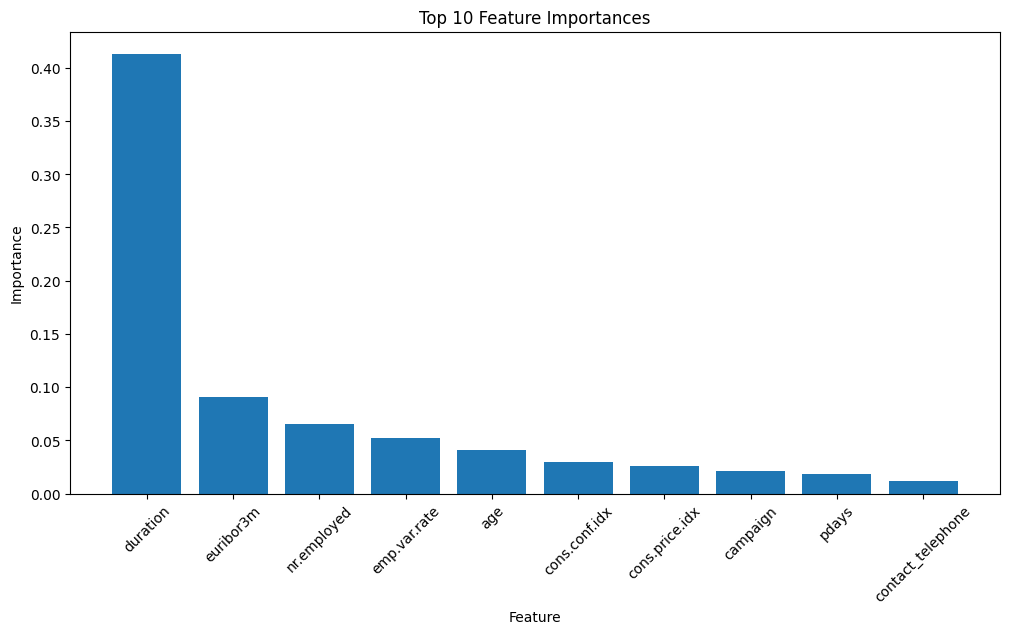

In [35]:
# 변수 중요도 추출
importances = best_rf_model.feature_importances_
feature_names = X_train.columns

# 데이터프레임 생성 및 정렬
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 시각화
plt.figure(figsize=(12, 6))
plt.bar(importance_df['Feature'][:10], importance_df['Importance'][:10])
plt.title("Top 10 Feature Importances")
plt.ylabel("Importance")
plt.xlabel("Feature")
plt.xticks(rotation=45)
plt.show()

### 교차 검증

In [36]:
from sklearn.model_selection import cross_val_score

# 교차 검증 수행
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='f1')
print(f"Cross-Validation F1 Scores: {cv_scores}")
print(f"Mean F1 Score: {cv_scores.mean()}")

Cross-Validation F1 Scores: [0.63095238 0.64664537 0.63240078 0.60897436 0.64308682]
Mean F1 Score: 0.6324119409601685


In [37]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score  # f1_score 임포트 추가
import numpy as np

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_scores = []

for train_idx, test_idx in skf.split(X, y):
    X_train_split, X_test_split = X.iloc[train_idx], X.iloc[test_idx]
    y_train_split, y_test_split = y.iloc[train_idx], y.iloc[test_idx]

    best_rf_model.fit(X_train_split, y_train_split)
    y_pred_split = best_rf_model.predict(X_test_split)
    f1_scores.append(f1_score(y_test_split, y_pred_split))  # f1_score 사용

print(f"Mean F1 Score: {np.mean(f1_scores)}")

Mean F1 Score: 0.644567019815957


### 추가 분석

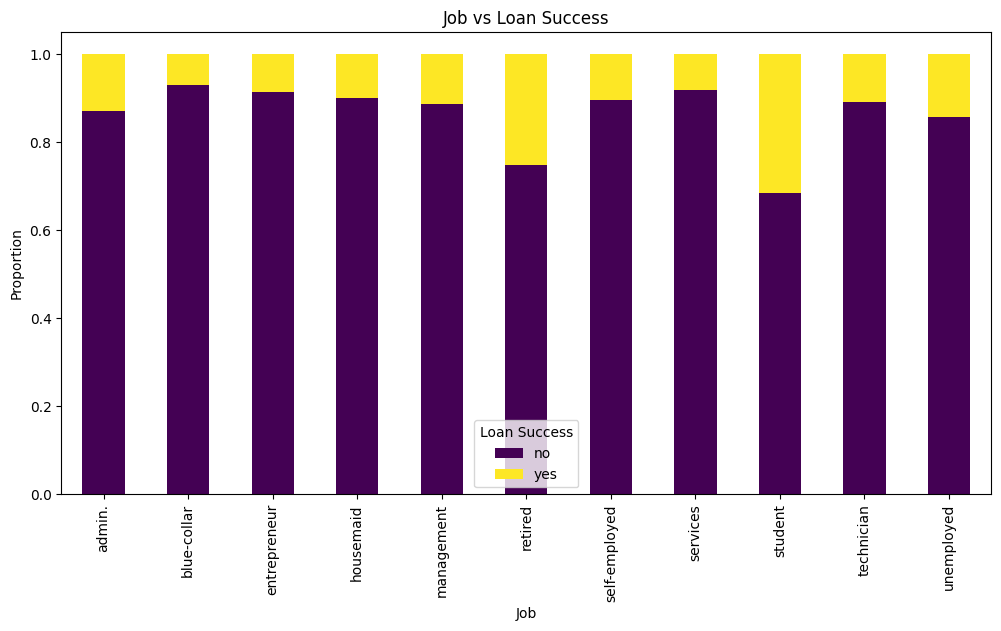

Chi-Square Test Result for 'job': p-value = 0.0000
Significant relationship between 'job' and loan success.


In [38]:
# 범주형 변수와 대출 성공 여부의 관계 분석

from scipy.stats import chi2_contingency

# 'job' 변수와 대출 성공 여부의 분포
job_y = pd.crosstab(data['job'], data['y'])
job_y_ratio = job_y.div(job_y.sum(axis=1), axis=0)

# 시각화
job_y_ratio.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title("Job vs Loan Success")
plt.ylabel("Proportion")
plt.xlabel("Job")
plt.legend(title="Loan Success")
plt.show()

# 카이제곱 검정
chi2, p, dof, expected = chi2_contingency(job_y)
print(f"Chi-Square Test Result for 'job': p-value = {p:.4f}")
if p < 0.05:
    print("Significant relationship between 'job' and loan success.")
else:
    print("No significant relationship between 'job' and loan success.")

1.	특정 직업군에서의 대출 성공률 차이
- 학생과 은퇴자는 대출 성공 가능성이 높지만, 블루칼라와 자영업자는 낮은 성공률을 보인다.
- 이는 직업군에 따라 대출 승인이 이루어지는 신용 평가 기준이 다를 수 있음을 시사한다.
2.	비즈니스 활용 가능성
- 성공 비율이 높은 그룹(학생, 은퇴자)에 더 많은 대출 상품을 집중적으로 제공하거나 마케팅 전략을 최적화할 수 있다.
- 반면, 성공 비율이 낮은 그룹(블루칼라, 자영업자)에는 추가적인 신용 지원 정책을 검토할 필요가 있다.
3.	직업군별 대출 조건 차별화 필요
- 성공률이 낮은 직업군의 경우 더 유리한 대출 조건(예: 낮은 금리, 추가 보증)을 제공하거나 대출 상품을 맞춤화하는 전략이 필요할 수 있다.

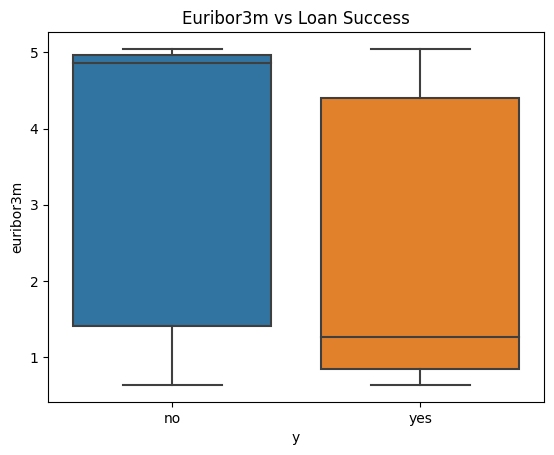

T-Test for 'euribor3m': t-stat = -62.5799, p-value = 0.0000
Significant difference in 'euribor3m' between loan success groups.


In [39]:
# 연속형 변수와 대출 성공 여부의 관계 분석

from scipy.stats import ttest_ind

# 'euribor3m' 변수와 대출 성공 여부
sns.boxplot(x='y', y='euribor3m', data=data)
plt.title("Euribor3m vs Loan Success")
plt.show()

# t-검정
y_yes = data[data['y'] == 'yes']['euribor3m']
y_no = data[data['y'] == 'no']['euribor3m']
t_stat, p_val = ttest_ind(y_yes, y_no, equal_var=False)
print(f"T-Test for 'euribor3m': t-stat = {t_stat:.4f}, p-value = {p_val:.4f}")
if p_val < 0.05:
    print("Significant difference in 'euribor3m' between loan success groups.")
else:
    print("No significant difference in 'euribor3m' between loan success groups.")

1. euribor3m와 대출 성공 여부의 관계
- euribor3m 값이 낮을수록 대출 성공(y=1) 가능성이 높은 경향이 있다.
- 반대로, euribor3m 값이 높을수록 대출 실패(y=0)로 이어지는 경향이 강하다.
2. 금리와 대출 성공의 상관성
- euribor3m는 시장 금리를 나타내며, 금리가 낮을수록 대출자에게 더 유리한 조건을 제공하기 때문일 가능성이 있다.
- 금리가 높은 경우 대출 조건이 까다로워지거나 대출자가 부담을 느껴 대출 승인이 어렵게 되는 현상을 반영할 수 있다.
3. 분포 차이
- 대출 실패 그룹(y=0)은 높은 금리 분포를 가지고 있으며, 이는 금리가 높을수록 대출 실패 확률이 증가한다는 가설을 강화한다.

**비즈니스 인사이트**
1.	금리 기반 대출 전략
- 낮은 금리를 제공하는 특정 상품은 대출 성공률을 높이는 데 기여할 가능성이 크다
- 높은 금리로 인해 대출 실패 가능성이 높은 고객군을 대상으로 대출 조건을 완화하거나 추가 혜택을 제공하는 전략이 필요하다.
2. 고객 세분화
- euribor3m 값이 낮은 고객군(1~2 사이)을 타겟으로 한 맞춤형 대출 상품을 설계할 수 있다.
- 반대로, 높은 금리를 가진 고객군(4 이상)은 신용 평가 또는 소득 정보를 보강하여 대출 성공 가능성을 높일 필요가 있다.
3. 대출 정책 조정
- euribor3m와 같은 외부 금리 지표가 높은 시기에는 대출 성공률이 낮아질 수 있으므로, 금리와 상관없이 고객 유입을 유지할 수 있는 대출 정책을 마련해야 한다.
